# Cyclistic Bike-Share Program Analysis
### Steven Adrian Gracia
### 9 January 2026
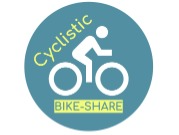

# Introduction


This case study serves as the capstone project for Coursera's Google Data Analytics Professional Certificate program.

# Ask

## Background

Cyclistic is a bike-share program that currently geotracks 5824 bicycles in a network of 692 stations across Chicago. The company offers three types of passes: single-ride passes, full-day passes, and annual memberships (of which the purchasers are referred to as Cyclistic members).
\
Cyclistic's finance analysts have concluded that annual members are much more profitable among the others. As a result of this, the director of marketing has set a goal of prioritizing the number of members via conversion rather than attracting new customers.

## Business Task

Analyze Cyclistic's trip data to discover how each customer type utilize Cyclistic's bikes differently as a basis for membership conversion.




# Prepare

Disclaimer: The data is taken from another real-life company since Cyclistic is a fictional one. It is available to the public under this [license](https://divvybikes.com/data-license-agreement). For the purposes of this case study it will be as if the dataset was gathered by and belongs to Cyclistic

The data used in this project is Cyclistic's trip data. The data is sourced from the company's database accessed via this [link](https://divvy-tripdata.s3.amazonaws.com/index.html), which is gathered from recording the bike's systems (GPS and sensors), station locations, and start/end times. The data is organized monthly with the file structure being
`[year][month]-divvy-tripdata.zip`. For the purposes of this case study, only the data for the past 12 months will be used, which are files starting with `202501-divvy-tripdata.zip` to `202512-divvy-tripdata.zip`. When extracted, the .csv files contained within can be directly used in the analysis process.

There are virtually no bias or credibility issues outside of computer errors because the bikes automatically collect data whenever a user interaction is detected. The original datasets were also processed to remove trips meant for maintenance and trips below 60 seconds (potential false starts or re-dockings). The reliability of the trip data is ensured because it came from the company itself.

# Process

Python is used in this project for data preparation and processing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Importing and Combining

The .csv files gained from extraction is placed into a dataset folder. There are 12 separate files which will be combined before starting the cleaning process.

In [2]:
# iterating filenames
df_year = pd.DataFrame()

for month in range (1,13): # month 1 to 12
    filename = "trip_dates_202501_to_202512\\"
    filename += "2025"
    if month < 10:
        filename += "0" # leading zero for single digit months
    filename += str(month) + "-divvy-tripdata.csv"
    print(filename)
    df_month = pd.read_csv(filename)
    print(str(len(df_month))+" data found")
    df_year = pd.concat([df_year,df_month],axis=0)

print(str(len(df_year))+" total data")

trip_dates_202501_to_202512\202501-divvy-tripdata.csv
138689 data found
trip_dates_202501_to_202512\202502-divvy-tripdata.csv
151880 data found
trip_dates_202501_to_202512\202503-divvy-tripdata.csv
298155 data found
trip_dates_202501_to_202512\202504-divvy-tripdata.csv
371341 data found
trip_dates_202501_to_202512\202505-divvy-tripdata.csv
502456 data found
trip_dates_202501_to_202512\202506-divvy-tripdata.csv
678904 data found
trip_dates_202501_to_202512\202507-divvy-tripdata.csv
763432 data found
trip_dates_202501_to_202512\202508-divvy-tripdata.csv
790177 data found
trip_dates_202501_to_202512\202509-divvy-tripdata.csv
714759 data found
trip_dates_202501_to_202512\202510-divvy-tripdata.csv
646039 data found
trip_dates_202501_to_202512\202511-divvy-tripdata.csv
356628 data found
trip_dates_202501_to_202512\202512-divvy-tripdata.csv
140534 data found
5552994 total data


Let's preview some of the basic information before proceeding

In [3]:
df_year.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [4]:
df_year.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7569BC890583FCD7,classic_bike,2025-01-21 17:23:54.538,2025-01-21 17:37:52.015,Wacker Dr & Washington St,KA1503000072,McClurg Ct & Ohio St,TA1306000029,41.883143,-87.637242,41.892592,-87.617289,member
1,013609308856B7FC,electric_bike,2025-01-11 15:44:06.795,2025-01-11 15:49:11.139,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Belmont Ave,TA1308000019,41.929147,-87.649153,41.939743,-87.658865,member
2,EACACD3CE0607C0D,classic_bike,2025-01-02 15:16:27.730,2025-01-02 15:28:03.230,Southport Ave & Waveland Ave,13235,Broadway & Cornelia Ave,13278,41.948226,-87.664071,41.945529,-87.646439,member
3,EAA2485BA64710D3,classic_bike,2025-01-23 08:49:05.814,2025-01-23 08:52:40.047,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member
4,7F8BE2471C7F746B,electric_bike,2025-01-16 08:38:32.338,2025-01-16 08:41:06.767,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member
5,0B8DD16A9B77A1C7,electric_bike,2025-01-02 16:09:06.825,2025-01-02 16:10:55.784,Halsted St & 21st St,13162,Halsted St & 18th St,13099,41.853780,-87.646603,41.857506,-87.645991,member
6,65DD88D2EA5AA24A,electric_bike,2025-01-19 01:11:59.684,2025-01-19 01:15:54.187,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.929143,-87.649077,41.928773,-87.663913,member
7,EAC4EE361C030130,electric_bike,2025-01-24 06:43:28.984,2025-01-24 07:01:38.943,Stave St & Armitage Ave,13266,Canal St & Madison St,13341,41.917741,-87.691392,41.882409,-87.639767,member
8,46267A54446162B5,electric_bike,2025-01-06 08:45:24.741,2025-01-06 08:50:20.458,Larrabee St & Kingsbury St,TA1306000009,Ogden Ave & Race Ave,13194,41.897764,-87.642884,41.891795,-87.658751,member
9,B5D4F9782121EA51,electric_bike,2025-01-01 16:56:36.927,2025-01-01 17:03:26.608,Albany Ave & Bloomingdale Ave,15655,Campbell Ave & Fullerton Ave,15648,41.914027,-87.705126,41.924632,-87.689307,member


## Data Cleaning

### Checking for null values

We will first see and possibly handle missing values in this dataset.

In [5]:
null_values = df_year.isnull().sum()
null_values

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1184673
start_station_id      1184673
end_station_name      1243305
end_station_id        1243305
start_lat                   0
start_lng                   0
end_lat                  5535
end_lng                  5535
member_casual               0
dtype: int64

First of all, let's see more clearly how these missing values manifest.

In [6]:
df_year[df_year.isnull().any(axis=1)].head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
570,17D700995824E844,electric_bike,2025-01-11 13:14:08.704,2025-01-11 13:17:22.993,Southport Ave & Waveland Ave,13235,NaN,NaN,41.948226,-87.664071,41.95,-87.65,member
571,692FF1F5D49A8473,electric_bike,2025-01-02 16:50:07.224,2025-01-02 16:55:19.459,Wacker Dr & Washington St,KA1503000072,NaN,NaN,41.883143,-87.637242,41.88,-87.65,member
1341,B16356D648E1F27A,electric_bike,2025-01-14 11:39:10.423,2025-01-14 11:47:24.251,Clark St & Elm St,TA1307000039,NaN,NaN,41.902973,-87.631280,41.89,-87.62,member
1342,CA08B6448602EE90,electric_bike,2025-01-15 20:07:58.620,2025-01-15 20:10:09.583,Sheffield Ave & Wellington Ave,TA1307000052,NaN,NaN,41.936253,-87.652662,41.94,-87.65,member
1343,BB17C90F52CA917D,electric_bike,2025-01-04 17:27:51.827,2025-01-04 17:36:06.877,Walsh Park,18067,NaN,NaN,41.914610,-87.667968,41.91,-87.70,member
1344,081DC4469EA761E1,electric_bike,2025-01-31 20:14:44.426,2025-01-31 20:23:18.455,Halsted St & Roscoe St,TA1309000025,NaN,NaN,41.943632,-87.649083,41.95,-87.67,member
1345,D57891C7FA156C06,electric_bike,2025-01-04 11:45:29.962,2025-01-04 12:00:25.204,Halsted St & Roscoe St,TA1309000025,NaN,NaN,41.943583,-87.649172,41.90,-87.64,member
1346,DF47DC8D493BF2F9,electric_bike,2025-01-15 11:59:35.245,2025-01-15 12:02:24.605,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,NaN,NaN,41.961406,-87.676169,41.96,-87.69,member
1347,47CCE86B151E7751,electric_bike,2025-01-12 18:54:49.719,2025-01-12 19:01:33.369,Benson Ave & Church St,596,NaN,NaN,42.048214,-87.683485,42.05,-87.69,member
1348,2679F1E624A9235A,electric_bike,2025-01-24 16:03:57.302,2025-01-24 16:07:30.480,Albany Ave & Bloomingdale Ave,15655,NaN,NaN,41.914027,-87.705126,41.91,-87.70,member


In [7]:
# percentages of missing data
print(f"Missing start_station_id: {null_values['start_station_id']/len(df_year)*100:.2f}%")
print(f"Missing end_station_id: {null_values['end_station_id']/len(df_year)*100:.2f}%")
print(f"Missing end_lat and end_ltg: {null_values['end_lat']/len(df_year)*100:.2f}%")

Missing start_station_id: 21.33%
Missing end_station_id: 22.39%
Missing end_lat and end_ltg: 0.10%


22% is not a small number of missing data. Missing starting and ending stations can be filled by cross-checking their latitudes and longitudes with the company's station data and missing ending latitudes and longitudes can be checked with the bike's next trip's starting coordinates. However, for the purposes of this project this will not be done because of its small impact on the analysis.

### Duplicate values

We can see duplicate values by looking at the total number of data and the number of unique values.

In [8]:
print(f"Total data: {len(df_year)}")
print(df_year.nunique())

Total data: 5552994
ride_id               5552994
rideable_type               2
started_at            5551938
ended_at              5550528
start_station_name       1893
start_station_id         3360
end_station_name         1901
end_station_id           3383
start_lat              118725
start_lng              116911
end_lat                  2030
end_lng                  2028
member_casual               2
dtype: int64


We can confirm that there are no duplicate `ride_ids`. We can also see that both `rideable_type` and `member_casual` have the correct numbers. Let's delve deeper into the timestamps first.

In [9]:
df_year[df_year['started_at'].duplicated(keep=False)].sort_values(by=['started_at']).head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
18121,388EE8144D1412E6,electric_bike,2025-01-08 07:06:51.762,2025-01-08 07:13:32.658,Calumet Ave & 18th St,13102,Wabash Ave & Roosevelt Rd,TA1305000002,41.857618,-87.619411,41.867227,-87.625961,member
103438,F417D0A72ECAFF7A,electric_bike,2025-01-08 07:06:51.762,2025-01-08 07:14:34.411,St. Clair St & Erie St,13016,Wacker Dr & Washington St,KA1503000072,41.894345,-87.622798,41.883143,-87.637242,member
35991,E986A136E78506A7,electric_bike,2025-01-08 15:26:26.437,2025-01-08 15:35:04.169,Pulaski Rd & 51st St,21343,Lawler Ave & 50th St,21400,41.800434,-87.724750,41.802170,-87.748940,casual
60840,08176EDF1F9DF20F,electric_bike,2025-01-08 15:26:26.437,2025-01-08 15:30:19.286,Fairbanks Ct & Grand Ave,TA1305000003,State St & Chicago Ave,21544,41.891847,-87.620580,41.896617,-87.628579,member
19250,F966998019BFA66C,classic_bike,2025-01-13 07:25:25.003,2025-01-13 07:54:21.009,Southport Ave & Wrightwood Ave,TA1307000113,McClurg Ct & Erie St,KA1503000041,41.928773,-87.663913,41.894503,-87.617854,member
50286,74294134D24EC97C,classic_bike,2025-01-13 07:25:25.003,2025-01-13 07:30:05.638,Clark St & Lincoln Ave,13179,Sedgwick St & North Ave,TA1307000038,41.915689,-87.634600,41.910983,-87.638525,member
127545,46FE15AC3E3ACAB1,electric_bike,2025-01-13 07:28:30.286,2025-01-13 07:29:48.310,NaN,NaN,Wabash Ave & Roosevelt Rd,TA1305000002,41.860000,-87.620000,41.867227,-87.625961,member
78544,F6551D62D8D01264,classic_bike,2025-01-13 07:28:30.286,2025-01-13 07:31:50.654,Columbus Dr & Randolph St,13263,Millennium Park,13008,41.884728,-87.619521,41.881032,-87.624084,member
77405,E76D456D6D0430C5,electric_bike,2025-01-17 17:32:26.188,2025-01-17 17:44:10.231,Rush St & Superior St,15530,Canal St & Adams St,13011,41.895765,-87.625908,41.879255,-87.639904,member
102677,940791CEF92FDC48,classic_bike,2025-01-17 17:32:26.188,2025-01-17 17:45:02.166,Franklin St & Jackson Blvd,TA1305000025,Michigan Ave & 14th St,TA1307000124,41.877708,-87.635321,41.864059,-87.623727,member


In [10]:
df_year[df_year['ended_at'].duplicated(keep=False)].sort_values(by=['ended_at']).head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
21372,4AF23CA697FA0C3B,classic_bike,2025-01-01 11:40:23.570,2025-01-01 12:21:47.945,State St & 35th St,TA1307000129,Wentworth Ave & 24th St,TA1308000026,41.831036,-87.626798,41.850084,-87.632141,member
116280,E7AC3501ED248FB7,electric_bike,2025-01-01 12:21:18.156,2025-01-01 12:21:47.945,NaN,NaN,NaN,NaN,42.060000,-87.720000,42.060000,-87.720000,casual
72594,2B58728981051171,classic_bike,2025-01-01 13:15:39.951,2025-01-01 14:48:57.249,Canal St & Madison St,13341,Sedgwick St & Huron St,TA1307000062,41.882409,-87.639767,41.894666,-87.638437,member
124351,5D3BCB9A735DD7F7,classic_bike,2025-01-01 12:00:03.286,2025-01-01 14:48:57.249,St. Clair St & Erie St,13016,Sedgwick St & Huron St,TA1307000062,41.894345,-87.622798,41.894666,-87.638437,member
124346,73AFB92C59627D37,classic_bike,2025-01-01 12:00:49.936,2025-01-01 14:48:57.249,St. Clair St & Erie St,13016,Sedgwick St & Huron St,TA1307000062,41.894345,-87.622798,41.894666,-87.638437,member
38999,66F529EECFBC5861,classic_bike,2025-01-01 09:21:01.648,2025-01-01 14:48:57.249,State St & Chicago Ave,21544,Sedgwick St & Huron St,TA1307000062,41.896617,-87.628579,41.894666,-87.638437,member
2831,ED7D16B2F18D91DB,classic_bike,2025-01-02 14:36:02.735,2025-01-02 15:30:56.062,Broadway & Belmont Ave,13277,Clifton Ave & Armitage Ave,TA1307000163,41.940106,-87.645451,41.918216,-87.656936,member
75363,C124D9B036EE4118,classic_bike,2025-01-02 14:15:19.343,2025-01-02 15:30:56.062,Wabash Ave & Adams St,KA1503000015,Clifton Ave & Armitage Ave,TA1307000163,41.879472,-87.625689,41.918216,-87.656936,member
48402,918CB637F64453FA,classic_bike,2025-01-03 07:24:07.020,2025-01-03 10:52:29.673,Broadway & Cornelia Ave,13278,Wilton Ave & Belmont Ave,TA1307000134,41.945529,-87.646439,41.940232,-87.652944,member
15215,A3795B710076F5EE,classic_bike,2025-01-03 07:54:30.417,2025-01-03 10:52:29.673,Lincoln Ave & Roscoe St*,chargingstx5,Wilton Ave & Belmont Ave,TA1307000134,41.943350,-87.670668,41.940232,-87.652944,member


In [11]:
df_year[df_year[['started_at','ended_at']].duplicated(keep=False)].count()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Seems pretty clear that all of them are coincidences, since none of them have the exact same id nor matching starting/ending times. Let's now investigate the disrepancy between station names and ids.

In [12]:
df_year[['start_station_id','start_station_name']].drop_duplicates(ignore_index=True).sort_values(by='start_station_name').head(10)

,start_station_id,start_station_name
2442,CHI00611,2112 W Peterson Ave
374,KA1504000155,2112 W Peterson Ave
2431,CHI01823,21st St & Pulaski Rd
550,21331,21st St & Pulaski Rd
1925,CHI00315,63rd St Beach
464,15491,63rd St Beach
2261,CHI01748,900 W Harrison St
1034,13028,900 W Harrison St
2897,CHI01976,Aberdeen St & 103rd St
891,24425,Aberdeen St & 103rd St


In [13]:
df_year[['end_station_id','end_station_name']].drop_duplicates(ignore_index=True).sort_values(by='end_station_name').head(10)

,end_station_id,end_station_name
356,KA1504000155,2112 W Peterson Ave
2499,CHI00611,2112 W Peterson Ave
2949,CHI01823,21st St & Pulaski Rd
752,21331,21st St & Pulaski Rd
608,15491,63rd St Beach
1839,CHI00315,63rd St Beach
1043,13028,900 W Harrison St
2248,CHI01748,900 W Harrison St
2981,CHI01976,Aberdeen St & 103rd St
1094,24425,Aberdeen St & 103rd St


It seems that both of them have duplicate ids for each station. This can be due to an id change. This will not be explored further due to not being relevant to the task. Let's investigate the latitudes and longitudes next.

In [14]:
df_year['start_lat'].drop_duplicates(ignore_index=True).sort_values()

1490      41.648501
105017    41.648604
9294      41.650000
20140     41.651419
9959      41.651893
            ...    
40390     42.064792
11218     42.064802
54304     42.064802
3306      42.064854
4354      42.070000
Name: start_lat, Length: 118725, dtype: float64

In [15]:
df_year['end_lat'].drop_duplicates(ignore_index=True).sort_values()

1720    41.49
1742    41.58
1885    41.59
1692    41.62
1784    41.63
        ...  
1982    42.11
1375    42.13
1743    42.17
1811    42.21
771       NaN
Name: end_lat, Length: 2031, dtype: float64

In [16]:
df_year['start_lng'].drop_duplicates(ignore_index=True).sort_values()

7434    -87.890000
93550   -87.880000
45442   -87.870000
24019   -87.860000
10145   -87.850000
           ...    
69347   -87.528425
69346   -87.528421
69345   -87.528323
4360    -87.528232
9040    -87.520000
Name: start_lng, Length: 116911, dtype: float64

In [17]:
df_year['end_lng'].drop_duplicates(ignore_index=True).sort_values()

2000   -88.10
1738   -88.06
1977   -88.04
1715   -87.98
1852   -87.94
        ...  
990    -87.52
1749   -87.51
1805   -87.50
1711   -87.42
766       NaN
Name: end_lng, Length: 2029, dtype: float64

The values seem consistent in range, but the difference of numbers in unique values is still worth looking into. Checking the original .csv files reveal that they have inconsistent decimal accuracies, which explains the different number of unique values.

### Changing to Datetime

The dataframe's `started_at` and `ended_at` are stored as strings. They need to be converted to datetime format for further processing. We will also add a `started_date` column to simplify visualizations.

In [18]:
df_year['started_at'] = pd.to_datetime(df_year['started_at'])
df_year['ended_at'] = pd.to_datetime(df_year['ended_at'])
df_year['started_date'] = df_year['started_at'].dt.date
df_year['started_date'].head()

0    2025-01-21
1    2025-01-11
2    2025-01-02
3    2025-01-23
4    2025-01-16
Name: started_date, dtype: object

### Adding `ride_length`

Timestamps on their own will not be useful to differentiate both customer types. We can convert them to `ride_length` instead to see how much each customer type spends on a trip

In [19]:
df_year['ride_length'] = df_year['ended_at']-df_year['started_at']
df_year['ride_length'].describe()

count                      5552994
mean     0 days 00:16:01.662967830
std      0 days 00:55:06.990289054
min       -1 days +23:05:12.312000
25%         0 days 00:05:23.696000
50%         0 days 00:09:25.563500
75%         0 days 00:16:33.794750
max         1 days 02:14:54.011000
Name: ride_length, dtype: object

There seems to be cases where the rides end before they start. Let's investigate further.

In [20]:
df_year[df_year['ride_length']<pd.Timedelta("0")].sort_values('started_at').head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,ride_length
51927,083534D28DA37F72,classic_bike,2025-11-02 01:17:57.001,2025-11-02 01:05:27.752,Clark St & Grace St,CHI00301,Grace St & Central Ave,CHI01799,41.950780,-87.659172,41.949533,-87.767265,member,2025-11-02,-1 days +23:47:30.751000
260584,A61B896123C0D647,classic_bike,2025-11-02 01:28:03.715,2025-11-02 01:05:17.029,Sacramento Ave & Lyndale St,CHI02126,Rush St & Cedar St,CHI00537,41.922350,-87.702410,41.902309,-87.627691,casual,2025-11-02,-1 days +23:37:13.314000
200471,120BC0544C3B92E4,classic_bike,2025-11-02 01:41:32.055,2025-11-02 01:08:10.359,Clark St & Chicago Ave,CHI00351,Clark St & Wrightwood Ave,CHI00287,41.896750,-87.630890,41.929546,-87.643118,casual,2025-11-02,-1 days +23:26:38.304000
200575,4446901DBDE0531B,classic_bike,2025-11-02 01:45:25.021,2025-11-02 01:08:08.134,Clark St & Chicago Ave,CHI00351,Clark St & Wrightwood Ave,CHI00287,41.896750,-87.630890,41.929546,-87.643118,casual,2025-11-02,-1 days +23:22:43.113000
157281,12E0A9A586A45DE3,electric_bike,2025-11-02 01:49:41.788,2025-11-02 01:02:30.041,Damen Ave & Thomas St (Augusta Blvd),CHI00296,NaN,NaN,41.901315,-87.677409,41.870000,-87.680000,member,2025-11-02,-1 days +23:12:48.253000
157264,9288498F5630E3AD,electric_bike,2025-11-02 01:49:48.360,2025-11-02 01:02:40.976,Damen Ave & Thomas St (Augusta Blvd),CHI00296,NaN,NaN,41.901315,-87.677409,41.870000,-87.680000,casual,2025-11-02,-1 days +23:12:52.616000
235211,A66DEC9146C488BF,electric_bike,2025-11-02 01:50:17.559,2025-11-02 01:07:46.445,NaN,NaN,Wilton Ave & Addison St,CHI02055,42.000000,-87.670000,41.947459,-87.653216,member,2025-11-02,-1 days +23:17:28.886000
26669,D1E5316AD88ECD45,classic_bike,2025-11-02 01:50:39.702,2025-11-02 01:14:04.164,Clark St & Ida B Wells Dr,CHI00216,Paulina St & Division St,CHI00244,41.875933,-87.630585,41.903553,-87.670429,casual,2025-11-02,-1 days +23:23:24.462000
276236,01C21B340CC1EEDA,classic_bike,2025-11-02 01:50:43.657,2025-11-02 01:03:13.912,California Ave & Milwaukee Ave,CHI00307,Paulina Ave & North Ave,CHI00258,41.922695,-87.697153,41.909855,-87.669930,casual,2025-11-02,-1 days +23:12:30.255000
167417,83995E751A0DB5D5,electric_bike,2025-11-02 01:50:50.530,2025-11-02 01:01:15.026,Paulina St & Division St,CHI00244,Kedzie Ave & Milwaukee Ave,CHI00378,41.903553,-87.670429,41.929714,-87.707988,member,2025-11-02,-1 days +23:10:24.496000


In [21]:
df_year[df_year['ride_length']<pd.Timedelta("0")].describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length
count,29,29,29.000000,29.000000,29.000000,29.000000,29
mean,2025-11-02 01:51:31.144103424,2025-11-02 01:09:41.334793216,41.918422,-87.665034,41.919730,-87.671660,-1 days +23:18:10.190689656
min,2025-11-02 01:17:57.001000,2025-11-02 01:01:15.026000,41.805661,-87.817095,41.800940,-87.786740,-1 days +23:05:12.312000
25%,2025-11-02 01:50:39.702000128,2025-11-02 01:04:31.464000,41.896750,-87.677409,41.902309,-87.680000,-1 days +23:10:07.012000
50%,2025-11-02 01:52:58.523000064,2025-11-02 01:06:51.164000,41.917805,-87.656921,41.922167,-87.660000,-1 days +23:16:25.674000
75%,2025-11-02 01:56:44.152000,2025-11-02 01:13:50.718000128,41.943600,-87.640000,41.949533,-87.640000,-1 days +23:25:57.474000
max,2025-11-02 01:59:56.801000,2025-11-02 01:33:52.225000,42.002311,-87.620000,41.996360,-87.625125,-1 days +23:47:30.751000
std,NaN,NaN,0.041224,0.039776,0.040362,0.043362,0 days 00:10:40.946026051


Turns out that every ride starting between 1 and 2 am exactly on 2 November 2025 had an anomaly. After a bit of research, 2 November was scheduled for daylight savings time(DST). We will have to check for ride times at 2 am on March 2025 since it was also scheduled for DST.

In [22]:
df_year.iloc[0]['started_date']

datetime.date(2025, 1, 21)

In [23]:
df_year[(df_year['started_at']>=dt.datetime(2025,3,8,2,0,0)) &
        (df_year['started_at']<=dt.datetime(2025,3,8,3,0,0))
        ].sort_values('started_at').head(100)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,ride_length
52637,773D6150D25099E5,electric_bike,2025-03-08 02:00:16.362,2025-03-08 02:11:48.205,NaN,NaN,NaN,NaN,41.980000,-87.670000,42.000000,-87.670000,member,2025-03-08,0 days 00:11:31.843000
119794,5A21C54BB0920EAF,electric_bike,2025-03-08 02:00:35.130,2025-03-08 02:08:16.590,Wilton Ave & Belmont Ave,TA1307000134,Clark St & Armitage Ave,13146,41.940232,-87.652944,41.918306,-87.636282,member,2025-03-08,0 days 00:07:41.460000
1290,FCF1D631583E7BA4,electric_bike,2025-03-08 02:00:36.281,2025-03-08 02:06:10.000,NaN,NaN,Clark St & Elmdale Ave,KA1504000148,41.990000,-87.660000,41.990860,-87.669724,casual,2025-03-08,0 days 00:05:33.719000
29695,E25860074BE09B3F,electric_bike,2025-03-08 02:01:31.665,2025-03-08 02:22:20.157,NaN,NaN,NaN,NaN,41.950000,-87.660000,41.960000,-87.730000,member,2025-03-08,0 days 00:20:48.492000
204002,6F268613B00F0537,electric_bike,2025-03-08 02:02:11.339,2025-03-08 02:07:28.918,NaN,NaN,Clinton St & Madison St,TA1305000032,41.870000,-87.640000,41.882752,-87.641190,member,2025-03-08,0 days 00:05:17.579000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114612,8AA7C2EAC58538C8,electric_bike,2025-03-08 02:52:56.137,2025-03-08 02:58:31.126,Halsted St & Fulton St,23003,Aberdeen St & Monroe St,13156,41.886871,-87.648089,41.880419,-87.655519,casual,2025-03-08,0 days 00:05:34.989000
289767,FFDDDDACB0838822,electric_bike,2025-03-08 02:55:20.801,2025-03-08 03:00:55.843,Mies van der Rohe Way & Chicago Ave,13338,Dearborn St & Erie St,13045,41.896945,-87.621758,41.893992,-87.629318,casual,2025-03-08,0 days 00:05:35.042000
50770,A069468C8F99CA5E,electric_bike,2025-03-08 02:55:25.680,2025-03-08 03:15:55.867,Mies van der Rohe Way & Chicago Ave,13338,NaN,NaN,41.896945,-87.621758,41.890000,-87.630000,casual,2025-03-08,0 days 00:20:30.187000
253797,4213C7B9C1BF528D,classic_bike,2025-03-08 02:58:25.427,2025-03-08 03:03:46.800,Sheffield Ave & Waveland Ave,TA1307000126,Broadway & Cornelia Ave,13278,41.949399,-87.654529,41.945529,-87.646439,member,2025-03-08,0 days 00:05:21.373000


There are no anomalies in this timeframe, so since there is no mentor/manager available to ask I will just add 1 hour to every `ride_length` between 1 am and 2 am on 2 November 2025.

In [24]:
df_year['ride_length'].describe()

count                      5552994
mean     0 days 00:16:01.662967830
std      0 days 00:55:06.990289054
min       -1 days +23:05:12.312000
25%         0 days 00:05:23.696000
50%         0 days 00:09:25.563500
75%         0 days 00:16:33.794750
max         1 days 02:14:54.011000
Name: ride_length, dtype: object

In [25]:
df_year.loc[(df_year['started_at']>=dt.datetime(2025,11,2,1,0,0)) &
        (df_year['started_at']<=dt.datetime(2025,11,2,2,0,0)),
        'ride_length'
        ] += pd.Timedelta(hours=1)
df_year['ride_length'].describe()

count                      5552994
mean     0 days 00:16:01.933308479
std      0 days 00:55:07.102453361
min         0 days 00:00:00.046000
25%         0 days 00:05:23.721250
50%         0 days 00:09:25.625000
75%         0 days 00:16:33.975000
max         1 days 02:14:54.011000
Name: ride_length, dtype: object

The divvy website mentions that trips below 60 seconds are not valid. So we will remove them from the dataframe.

In [26]:
df_year = df_year[df_year['ride_length']>=pd.Timedelta(minutes=1)]
df_year['ride_length'].describe()

count                      5405639
mean     0 days 00:16:27.537605828
std      0 days 00:55:48.186146455
min                0 days 00:01:00
25%         0 days 00:05:40.805000
50%         0 days 00:09:41.254000
75%         0 days 00:16:52.161000
max         1 days 02:14:54.011000
Name: ride_length, dtype: object

Trips that went for more than 1 day also do not make much sense. Due to the lack of a mentor/manager to question, I will try to clean these outliers as well. Since the company charges a stolen bike fee after a 24-hour period, those records will be dropped.

In [27]:
df_year = df_year[df_year['ride_length']<=pd.Timedelta(days=1)]
df_year['ride_length'].describe()

count                      5400053
mean     0 days 00:14:55.503244295
std      0 days 00:28:59.253128635
min                0 days 00:01:00
25%         0 days 00:05:40.589000
50%         0 days 00:09:40.654000
75%         0 days 00:16:50.071000
max         0 days 23:59:58.557000
Name: ride_length, dtype: object

Since the day pass provides free 3 hour rides, we can assume that day pass holders would not ride for over 3 hours at a time because of fees. We will need to know how many of each member type did these long trips first.

In [28]:
df_year[(df_year['ride_length']>pd.Timedelta(hours=3))
        ]['member_casual'].value_counts()

member_casual
casual    6696
member    3929
Name: count, dtype: int64

In [29]:
len(df_year[(df_year['ride_length']>pd.Timedelta(hours=3))])/len(df_year)

0.0019675732812252027

I cannot disregard only one type of member with those proportions. What I can do instead is to wipe clean every trip over 3 hours long due to being an outlier that only consists of .2% of the whole data.

In [30]:
df_year = df_year[df_year['ride_length']<=pd.Timedelta(hours=3)]
df_year['ride_length'].describe()

count                      5389428
mean     0 days 00:14:03.216535837
std      0 days 00:15:01.848657757
min                0 days 00:01:00
25%         0 days 00:05:40.183000
50%         0 days 00:09:39.495000
75%         0 days 00:16:46.077500
max         0 days 02:59:59.677000
Name: ride_length, dtype: object

### Adding `day_of_week`

The final variable that will be added is the date of the week, based on the starting date.

In [31]:
df_year['day_of_week'] = pd.to_datetime(df_year['started_date']).dt.strftime('%a')
df_year.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,ride_length,day_of_week
0,7569BC890583FCD7,classic_bike,2025-01-21 17:23:54.538,2025-01-21 17:37:52.015,Wacker Dr & Washington St,KA1503000072,McClurg Ct & Ohio St,TA1306000029,41.883143,-87.637242,41.892592,-87.617289,member,2025-01-21,0 days 00:13:57.477000,Tue
1,013609308856B7FC,electric_bike,2025-01-11 15:44:06.795,2025-01-11 15:49:11.139,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Belmont Ave,TA1308000019,41.929147,-87.649153,41.939743,-87.658865,member,2025-01-11,0 days 00:05:04.344000,Sat
2,EACACD3CE0607C0D,classic_bike,2025-01-02 15:16:27.730,2025-01-02 15:28:03.230,Southport Ave & Waveland Ave,13235,Broadway & Cornelia Ave,13278,41.948226,-87.664071,41.945529,-87.646439,member,2025-01-02,0 days 00:11:35.500000,Thu
3,EAA2485BA64710D3,classic_bike,2025-01-23 08:49:05.814,2025-01-23 08:52:40.047,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member,2025-01-23,0 days 00:03:34.233000,Thu
4,7F8BE2471C7F746B,electric_bike,2025-01-16 08:38:32.338,2025-01-16 08:41:06.767,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member,2025-01-16,0 days 00:02:34.429000,Thu
5,0B8DD16A9B77A1C7,electric_bike,2025-01-02 16:09:06.825,2025-01-02 16:10:55.784,Halsted St & 21st St,13162,Halsted St & 18th St,13099,41.853780,-87.646603,41.857506,-87.645991,member,2025-01-02,0 days 00:01:48.959000,Thu
6,65DD88D2EA5AA24A,electric_bike,2025-01-19 01:11:59.684,2025-01-19 01:15:54.187,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.929143,-87.649077,41.928773,-87.663913,member,2025-01-19,0 days 00:03:54.503000,Sun
7,EAC4EE361C030130,electric_bike,2025-01-24 06:43:28.984,2025-01-24 07:01:38.943,Stave St & Armitage Ave,13266,Canal St & Madison St,13341,41.917741,-87.691392,41.882409,-87.639767,member,2025-01-24,0 days 00:18:09.959000,Fri
8,46267A54446162B5,electric_bike,2025-01-06 08:45:24.741,2025-01-06 08:50:20.458,Larrabee St & Kingsbury St,TA1306000009,Ogden Ave & Race Ave,13194,41.897764,-87.642884,41.891795,-87.658751,member,2025-01-06,0 days 00:04:55.717000,Mon
9,B5D4F9782121EA51,electric_bike,2025-01-01 16:56:36.927,2025-01-01 17:03:26.608,Albany Ave & Bloomingdale Ave,15655,Campbell Ave & Fullerton Ave,15648,41.914027,-87.705126,41.924632,-87.689307,member,2025-01-01,0 days 00:06:49.681000,Wed


### Saving the Data

In [32]:
df_year.to_csv("trip_dates_202501_to_202512\\2025-divvy-tripdata.csv", index=False)

# Analyze

As a reminder, the business task is still analyzing the difference between casual riders and members. The analyzing process will be accompanied by simple visualizations along the way.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv("trip_dates_202501_to_202512\\2025-divvy-tripdata.csv")

In [34]:
# reconverting time data because they are stored as strings
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_date'] = pd.to_datetime(df['started_date']).dt.date
df['ride_length'] = pd.to_timedelta(df['ride_length'])

## Number of Rides

In [35]:
df['member_casual'].value_counts()

member_casual
member    3480300
casual    1909128
Name: count, dtype: int64

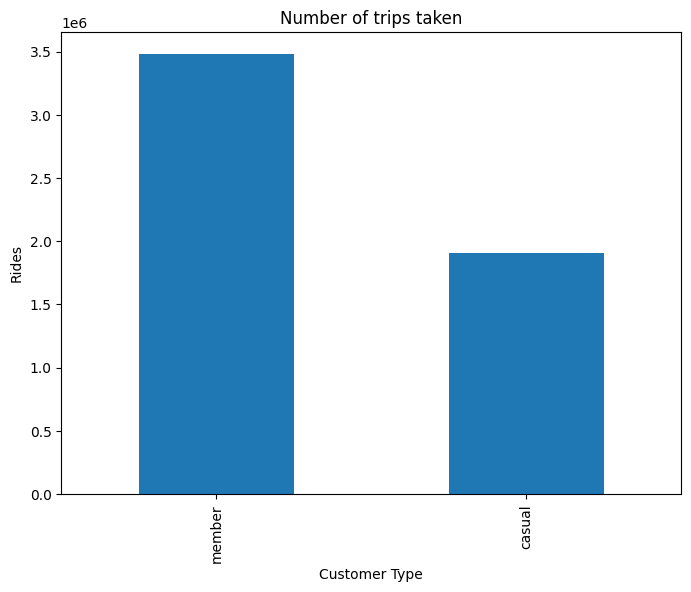

In [36]:
df['member_casual'].value_counts().plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('Number of trips taken')
plt.xlabel('Customer Type')
plt.ylabel('Rides')
plt.show()

There are about 1.8x as many trips by members than by casual customers. However, this does NOT mean the average member rides 1.8x as often as the average casual due to this dataset not taking the number of customers into account.

## Type of Bike

In [37]:
df.groupby(['member_casual','rideable_type']).size().unstack(level='rideable_type')

rideable_type,classic_bike,electric_bike
member_casual,,
casual,661804,1247324
member,1272466,2207834


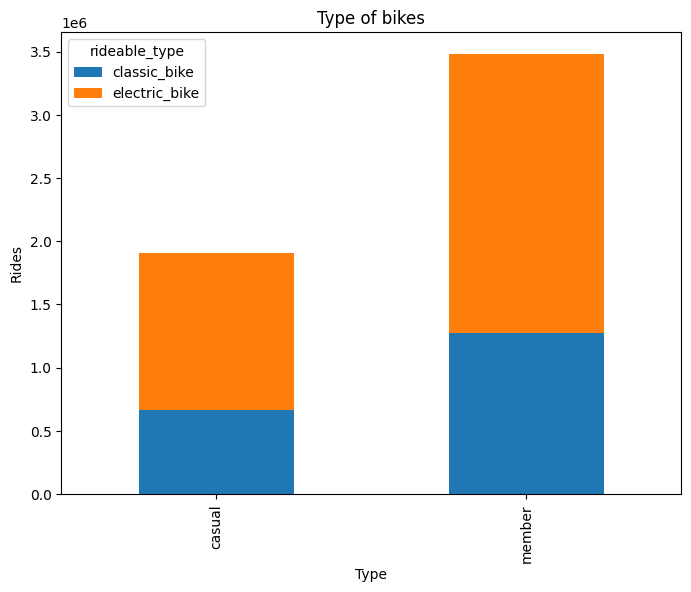

In [38]:
df.groupby(['member_casual','rideable_type']).size().unstack(level='rideable_type').plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('Type of bikes')
plt.xlabel('Type')
plt.ylabel('Rides')
plt.show()

In both types of customers, electric bikes see a 2x usage compared to its classic counterpart. We can see that this trend is not dependent on the customer type.

## Riding Patterns (Day of Week)

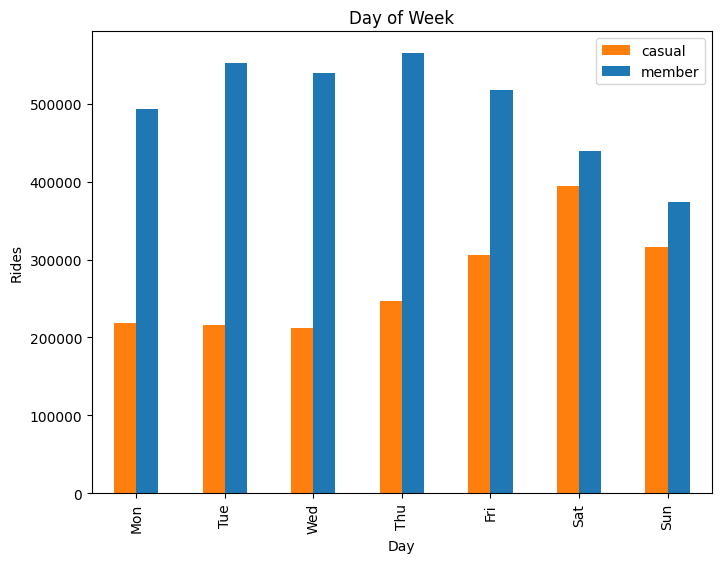

In [39]:
a = df.groupby(['member_casual','day_of_week']).size().unstack(level='member_casual')
a = a.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

a.plot(kind='bar', figsize=(8, 6), color=['C1','C0'])

plt.ylim(0)
plt.title('Day of Week')
plt.xlabel('Day')
plt.ylabel('Rides')
plt.legend()
plt.show()

Member's usage of bikes peak during weekdays, suggesting that they are more likely to use these bikes as transportation for daily transportation (work/study). On the other hand, casual customers use bikes more near the weekend, presumably more for side activities (recreation or exercising) not related to their jobs/studies.

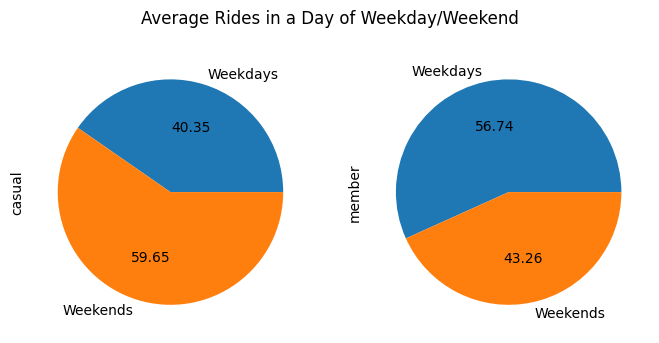

In [40]:
a = df.groupby(['member_casual','day_of_week']).size().unstack(level='member_casual')

b = pd.concat([a.loc[['Mon','Tue','Wed','Thu','Fri']].mean(),
              a.loc[['Sat','Sun']].mean()],
              axis=1, 
              keys=['Weekdays','Weekends'])
b.T.plot(kind='pie', subplots=True, figsize=(8, 6), autopct='%.2f', legend=False)

plt.suptitle('Average Rides in a Day of Weekday/Weekend', y=0.8)
# plt.xlabel('Day')
# plt.ylabel('Rides')
plt.show()

To justify the presumptions, we will also see the number of rides by time of day.

## Riding Patterns (Time of Day)

C:\Users\Steven Adrian\AppData\Local\Temp\ipykernel_19772\2695186492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['started_at_second'] = a['started_at'].dt.hour*3600 + a['started_at'].dt.minute*60 + a['started_at'].dt.second


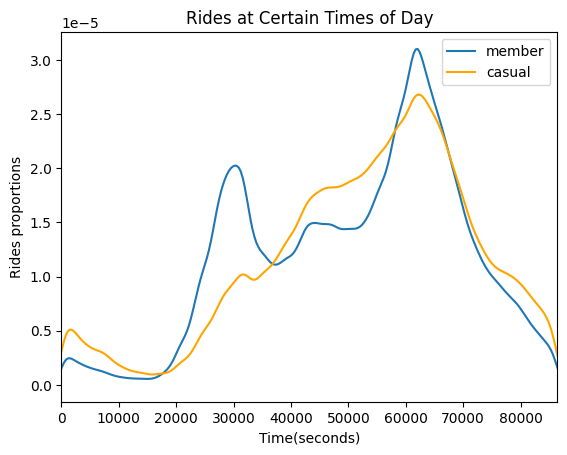

In [41]:
a = df[['member_casual','started_at']]
a['started_at_second'] = a['started_at'].dt.hour*3600 + a['started_at'].dt.minute*60 + a['started_at'].dt.second

a[a['member_casual']=='member']['started_at_second'].plot.density(ind=500, label='member')
a[a['member_casual']=='casual']['started_at_second'].plot.density(ind=500, label='casual', color='orange')

plt.title('Rides at Certain Times of Day')
plt.xlabel('Time(seconds)')
plt.ylabel('Rides proportions')
plt.xlim(0,86400)
plt.legend()
plt.show()

C:\Users\Steven Adrian\AppData\Local\Temp\ipykernel_19772\2134986525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['started_at_second'] = a['started_at'].dt.hour*3600 + a['started_at'].dt.minute*60 + a['started_at'].dt.second


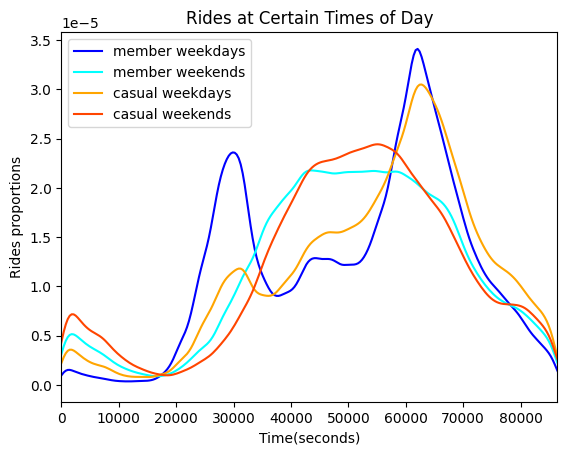

In [42]:
a = df[['member_casual','started_at','day_of_week']]
a['started_at_second'] = a['started_at'].dt.hour*3600 + a['started_at'].dt.minute*60 + a['started_at'].dt.second

# member weekdays
a[(a['member_casual']=='member') & 
  (a['day_of_week'] != 'Sat') & 
  (a['day_of_week'] != 'Sun')]['started_at_second'].plot.density(ind=500, label='member weekdays', color='blue')

# member weekends
a[(a['member_casual']=='member') & 
  (
    (a['day_of_week'] == 'Sat') | 
    (a['day_of_week'] == 'Sun')
  )]['started_at_second'].plot.density(ind=500, label='member weekends', color='cyan')

# casual weekdays
a[(a['member_casual']=='casual') & 
  (a['day_of_week'] != 'Sat') & 
  (a['day_of_week'] != 'Sun')]['started_at_second'].plot.density(ind=500, label='casual weekdays', color='orange')

# member weekends
a[(a['member_casual']=='casual') & 
  (
    (a['day_of_week'] == 'Sat') | 
    (a['day_of_week'] == 'Sun')
  )]['started_at_second'].plot.density(ind=500, label='casual weekends', color='orangered')

plt.title('Rides at Certain Times of Day')
plt.xlabel('Time(seconds)')
plt.ylabel('Rides proportions')
plt.xlim(0,86400)
plt.legend()
plt.show()

We can see that generally, a number of customers start riding very early in the morning, and have distinct behaviours on weekdays and weekends. On weekdays, a lot of them use bikes to ride during the morning rush hour (30000 seconds ~8 am) and peaking during the evening rush hour (60000 seconds ~5 pm). For weekends, we can see a trend of people cycling in the afternoon (40000-60000 seconds ~11 am to 5 pm). Interestingly, there are significantly more members who use bikes in the morning weekdays than casuals, compared to their usage in the evening rush hour. This could imply that although both types of customers use bikes to regularly commute to and from work/study, members are more inclined to using bikes in the morning (due to the membership) while a large number of casuals prefer another alternative.

## Riding Patterns (Season)

C:\Users\Steven Adrian\AppData\Local\Temp\ipykernel_19772\4211337372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['season'] = pd.to_datetime(a['started_date']).dt.month.map(month_to_season)


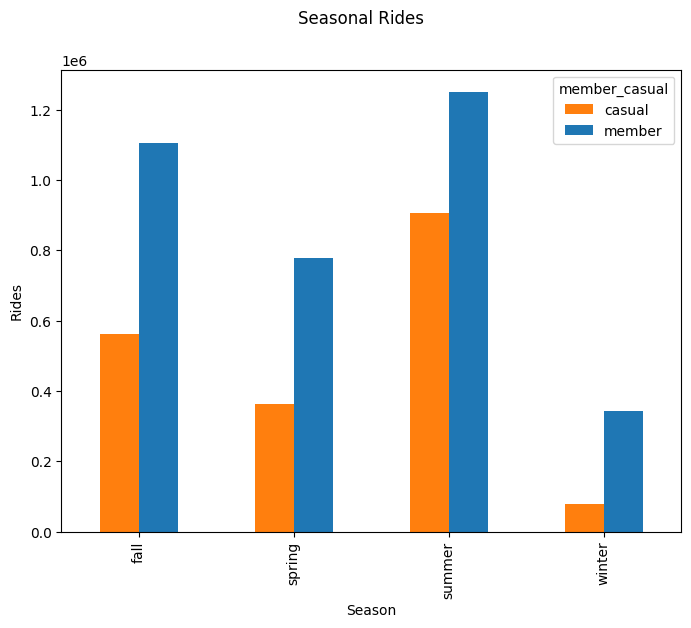

In [43]:
seasons = ['winter','winter','spring','spring','spring','summer','summer','summer','fall','fall','fall','winter']
month_to_season = dict(zip(range(1,13), seasons))
a = df[['member_casual','started_date']]
a['season'] = pd.to_datetime(a['started_date']).dt.month.map(month_to_season)

a.groupby(['member_casual','season']).size().unstack(level='member_casual').plot(kind='bar', figsize=(8, 6), color=['C1','C0'])

plt.suptitle('Seasonal Rides')
plt.xlabel('Season')
plt.ylabel('Rides')
plt.show()


C:\Users\Steven Adrian\AppData\Local\Temp\ipykernel_19772\2820901733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['season'] = pd.to_datetime(a['started_date']).dt.month.map(month_to_season)


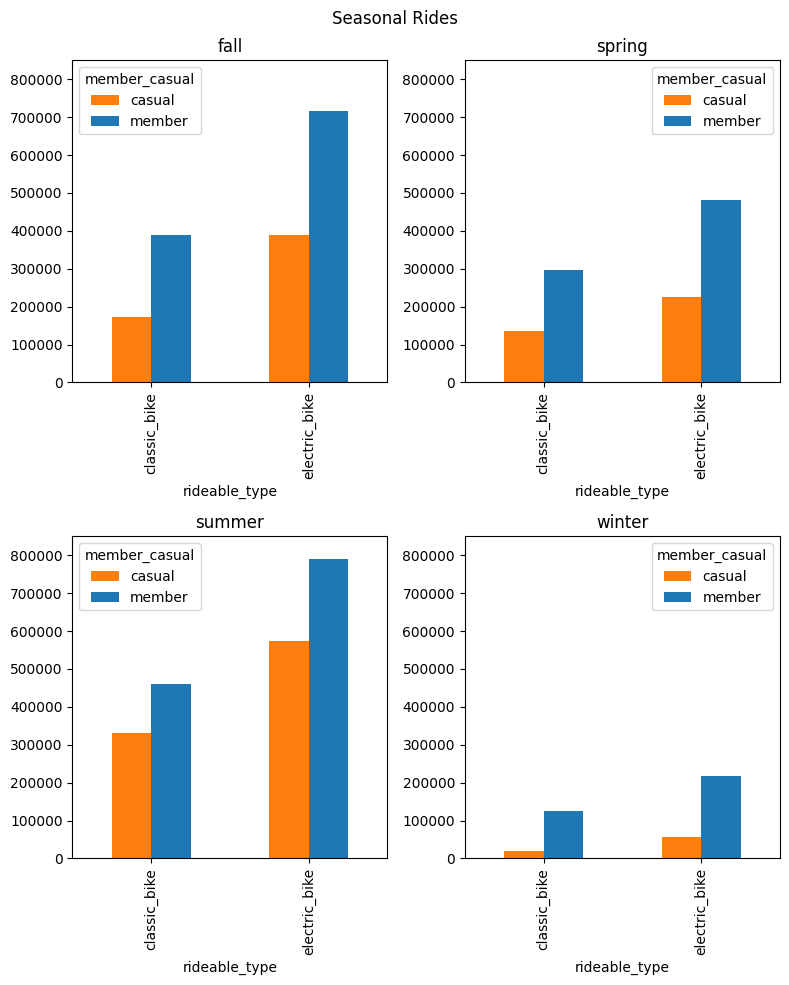

In [44]:
seasons = ['winter','winter','spring','spring','spring','summer','summer','summer','fall','fall','fall','winter']
month_to_season = dict(zip(range(1,13), seasons))
a = df[['member_casual','started_date','rideable_type']]
a['season'] = pd.to_datetime(a['started_date']).dt.month.map(month_to_season)

fig, axes = plt.subplots(2, 2, figsize=(8, 10))
a[a['season']=='fall'].groupby(['member_casual','rideable_type']).size().unstack(level='member_casual').plot(kind='bar', ax=axes[0][0], ylim=(0,850000), color=['C1','C0'], title='fall')
a[a['season']=='spring'].groupby(['member_casual','rideable_type']).size().unstack(level='member_casual').plot(kind='bar', ax=axes[0][1], ylim=(0,850000), color=['C1','C0'], title='spring')
a[a['season']=='summer'].groupby(['member_casual','rideable_type']).size().unstack(level='member_casual').plot(kind='bar', ax=axes[1][0], ylim=(0,850000), color=['C1','C0'], title='summer')
a[a['season']=='winter'].groupby(['member_casual','rideable_type']).size().unstack(level='member_casual').plot(kind='bar', ax=axes[1][1], ylim=(0,850000), color=['C1','C0'], title='winter')

plt.suptitle('Seasonal Rides')
plt.tight_layout()
plt.show()

In general, summer had the most rides; followed by fall, spring and winter. Classic bikes are less used in every season compared to its electric counterpart. It should be noted that there is a significant increase of casual rides in summer compared to member rides when looking at other seasons.

In [45]:
a = df[['member_casual','started_date','day_of_week']]
a.groupby(['member_casual','day_of_week']).size().unstack(level='member_casual').reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

member_casual,casual,member
day_of_week,,
Mon,218489,492753
Tue,216301,551957
Wed,212242,539698
Thu,247209,564627
Fri,305393,517915
Sat,393946,439325
Sun,315548,374025


C:\Users\Steven Adrian\AppData\Local\Temp\ipykernel_19772\39784524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['season'] = pd.to_datetime(a['started_date']).dt.month.map(month_to_season)


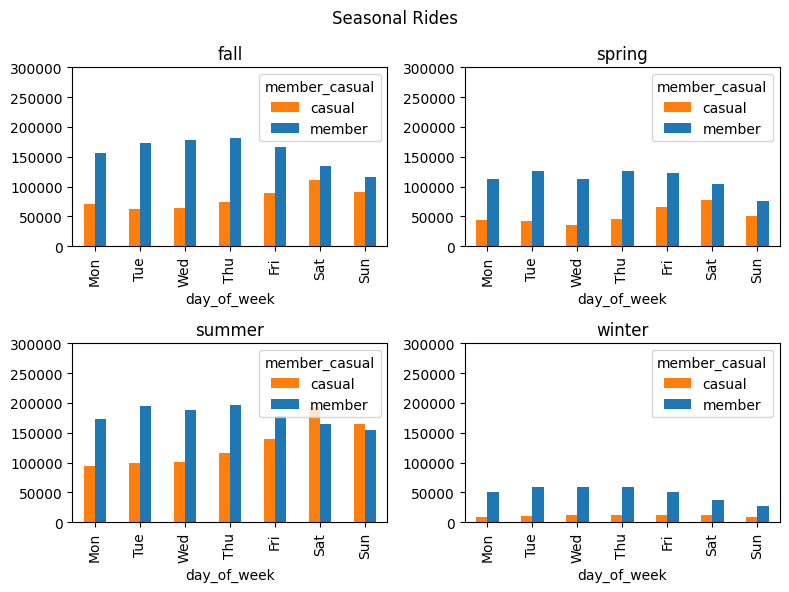

In [46]:
seasons = ['winter','winter','spring','spring','spring','summer','summer','summer','fall','fall','fall','winter']
month_to_season = dict(zip(range(1,13), seasons))
a = df[['member_casual','started_date','day_of_week']]
a['season'] = pd.to_datetime(a['started_date']).dt.month.map(month_to_season)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
a[a['season']=='fall'].groupby(['member_casual','day_of_week']).size().unstack(level='member_casual').reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']).plot(kind='bar', ax=axes[0][0], ylim=(0,300000), color=['C1','C0'], title='fall')
a[a['season']=='spring'].groupby(['member_casual','day_of_week']).size().unstack(level='member_casual').reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']).plot(kind='bar', ax=axes[0][1], ylim=(0,300000), color=['C1','C0'], title='spring')
a[a['season']=='summer'].groupby(['member_casual','day_of_week']).size().unstack(level='member_casual').reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']).plot(kind='bar', ax=axes[1][0], ylim=(0,300000), color=['C1','C0'], title='summer')
a[a['season']=='winter'].groupby(['member_casual','day_of_week']).size().unstack(level='member_casual').reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']).plot(kind='bar', ax=axes[1][1], ylim=(0,300000), color=['C1','C0'], title='winter')

plt.suptitle('Seasonal Rides')
plt.tight_layout()
plt.show()

There does not seem to be any difference between day-of-week trends over the seasons.

## Length of Rides

In [47]:
df['ride_length'].describe()

count                      5389428
mean     0 days 00:14:03.216535837
std      0 days 00:15:01.848657757
min                0 days 00:01:00
25%         0 days 00:05:40.183000
50%         0 days 00:09:39.495000
75%         0 days 00:16:46.077500
max         0 days 02:59:59.677000
Name: ride_length, dtype: object

Because of our data cleaning earlier, ride lengths are limited to those between 1 minute and 3 hours. We can see that the average trip is about 14 minutes long. We can also see that there are a significantly more number of short trips seen by the quartiles.

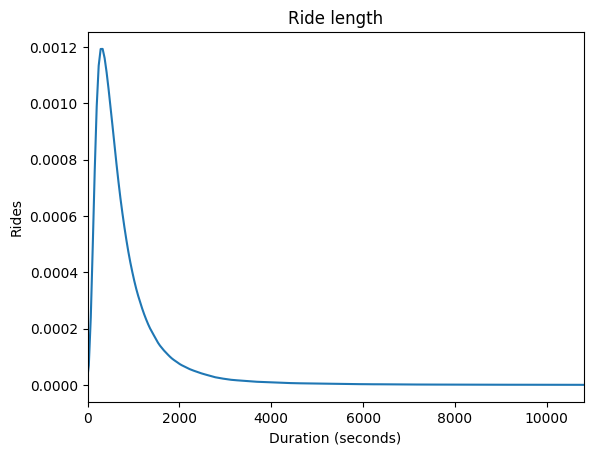

In [48]:
df['ride_length'].dt.total_seconds().plot.density(ind=500)

plt.title('Ride length')
plt.xlabel('Duration (seconds)')
plt.xlim(0,10800)
plt.ylabel('Rides')
plt.show()

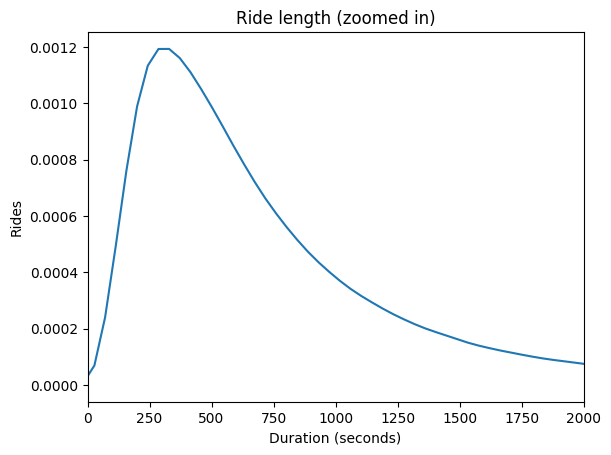

In [49]:
zoomed = df['ride_length'].dt.total_seconds()
zoomed.plot.density(ind=500)

plt.title('Ride length (zoomed in)')
plt.xlabel('Duration (seconds)')
plt.xlim(0,2000)
plt.ylabel('Rides')
plt.show()

10th %: 214 seconds
20th %: 299 seconds
30th %: 383 seconds
40th %: 474 seconds
50th %: 579 seconds
60th %: 711 seconds
70th %: 888 seconds
80th %: 1158 seconds
90th %: 1694 seconds


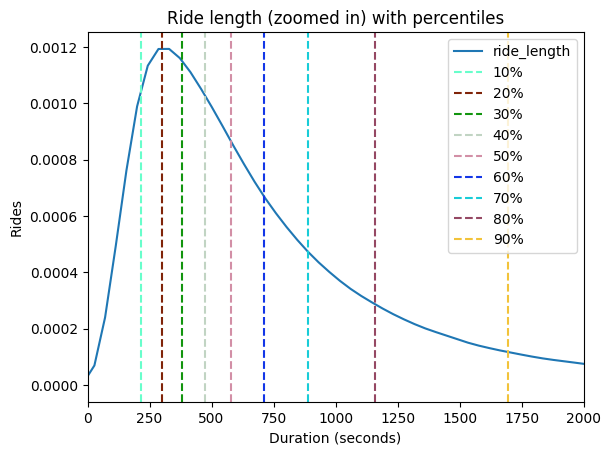

In [50]:
zoomed = df['ride_length'].dt.total_seconds()
zoomed.plot.density(ind=500)

plt.title('Ride length (zoomed in) with percentiles')
plt.xlabel('Duration (seconds)')
plt.xlim(0,2000)
plt.ylabel('Rides')
for i in range(1,10):
    r = np.random.rand()
    g = np.random.rand()
    b = np.random.rand()
    plt.axvline(np.percentile(zoomed,i*10),
                linestyle='dashed', 
                color=(r,g,b), 
                label=str(i*10)+'%')
    print(f'{i*10}th %: {np.percentile(zoomed,i*10):.0f} seconds')
plt.legend()
plt.show()

We can see that rides are more likely to be short (peaks at around 5 minutes). Only less than 10% of rides last more than 30 minutes too.

### Length of Rides (Member Separated)

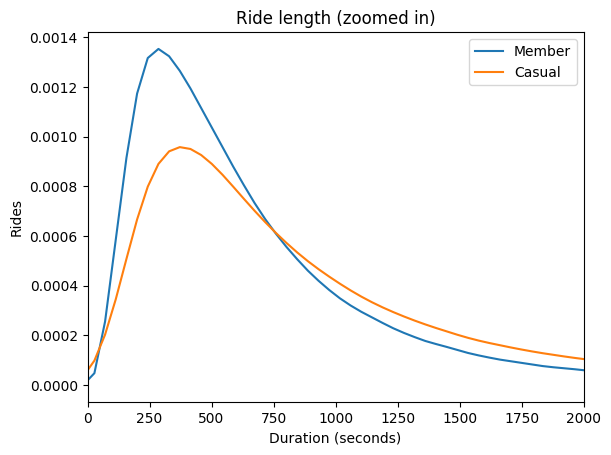

In [51]:
zoomed_member = df[df['member_casual']=='member']['ride_length'].dt.total_seconds()
zoomed_member.plot.density(ind=500, label='Member')

zoomed_casual = df[df['member_casual']=='casual']['ride_length'].dt.total_seconds()
zoomed_casual.plot.density(ind=500, label='Casual')

plt.title('Ride length (zoomed in)')
plt.xlabel('Duration (seconds)')
plt.xlim(0,2000)
plt.ylabel('Rides')
plt.legend()
plt.show()

Casuals are more likely to take longer trips than members. This could be due to the incentivize to maximize the value of day passes.

### Length of Rides Weekend/Weekday

C:\Users\Steven Adrian\AppData\Local\Temp\ipykernel_19772\1486334510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['ride_length_second'] = a['ride_length'].dt.total_seconds()


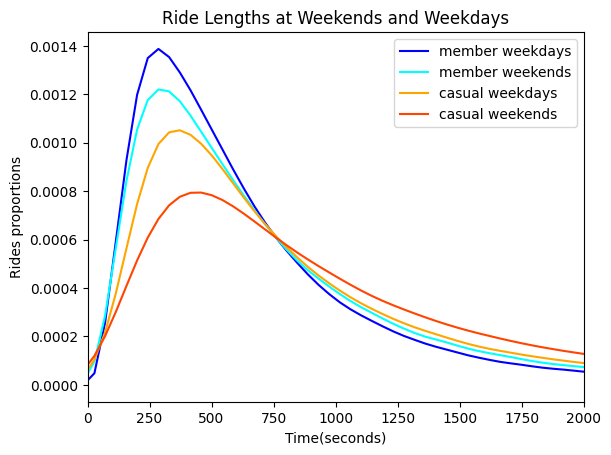

In [52]:
a = df[['member_casual','ride_length','day_of_week']]
a['ride_length_second'] = a['ride_length'].dt.total_seconds()
# member weekdays
a[(a['member_casual']=='member') & 
  (a['day_of_week'] != 'Sat') & 
  (a['day_of_week'] != 'Sun')
  ]['ride_length_second'].plot.density(ind=500, label='member weekdays', color='blue')

# member weekends
a[(a['member_casual']=='member') & 
  (
    (a['day_of_week'] == 'Sat') | 
    (a['day_of_week'] == 'Sun')
  )]['ride_length_second'].plot.density(ind=500, label='member weekends', color='cyan')

# casual weekdays
a[(a['member_casual']=='casual') & 
  (a['day_of_week'] != 'Sat') & 
  (a['day_of_week'] != 'Sun')
  ]['ride_length_second'].plot.density(ind=500, label='casual weekdays', color='orange')

# member weekends
a[(a['member_casual']=='casual') & 
  (
    (a['day_of_week'] == 'Sat') | 
    (a['day_of_week'] == 'Sun')
  )]['ride_length_second'].plot.density(ind=500, label='casual weekends', color='orangered')

plt.title('Ride Lengths at Weekends and Weekdays')
plt.xlabel('Time(seconds)')
plt.ylabel('Rides proportions')
plt.xlim(0,2000)
plt.legend()
plt.show()

This chart tells us that being members and riding on weekdays contribute the most to shorter trip durations (peaking at ~6 mins). Meanwhile, being casuals and riding on weekends are more likely to spend more time. 

### Length of Rides in Seasons

C:\Users\Steven Adrian\AppData\Local\Temp\ipykernel_19772\1147792863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['ride_length_second'] = a['ride_length'].dt.total_seconds()
C:\Users\Steven Adrian\AppData\Local\Temp\ipykernel_19772\1147792863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['season'] = pd.to_datetime(a['started_date']).dt.month.map(month_to_season)


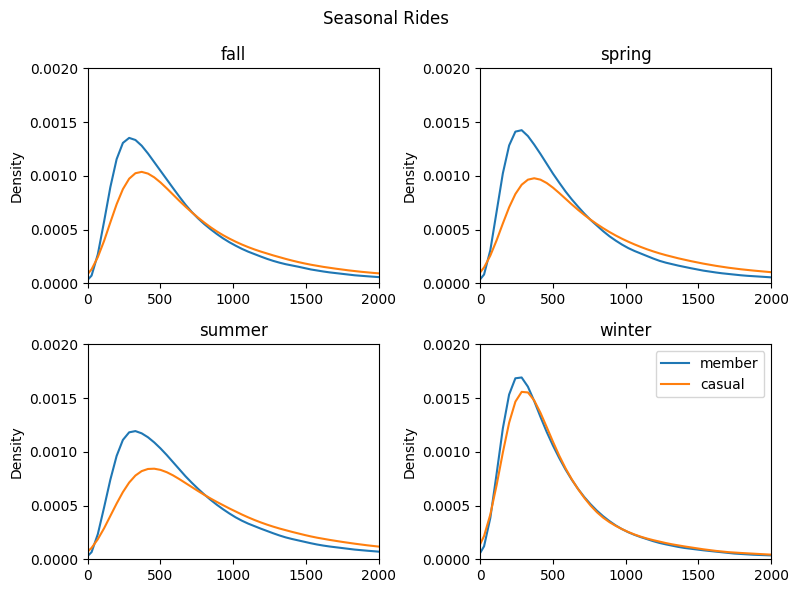

In [53]:
seasons = ['winter','winter','spring','spring','spring','summer','summer','summer','fall','fall','fall','winter']
month_to_season = dict(zip(range(1,13), seasons))
a = df[['member_casual','started_date','ride_length']]
a['ride_length_second'] = a['ride_length'].dt.total_seconds()
a['season'] = pd.to_datetime(a['started_date']).dt.month.map(month_to_season)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
a[(a['season']=='fall') & (a['member_casual']=='member')]['ride_length_second'].plot.density(ind=500, ax=axes[0][0], color='C0', title='fall', label='member')
a[(a['season']=='fall') & (a['member_casual']=='casual')]['ride_length_second'].plot.density(ind=500, ax=axes[0][0], color='C1', title='fall', label='casual')
a[(a['season']=='spring') & (a['member_casual']=='member')]['ride_length_second'].plot.density(ind=500, ax=axes[0][1], color='C0', title='spring', label='member')
a[(a['season']=='spring') & (a['member_casual']=='casual')]['ride_length_second'].plot.density(ind=500, ax=axes[0][1], color='C1', title='spring', label='casual')
a[(a['season']=='summer') & (a['member_casual']=='member')]['ride_length_second'].plot.density(ind=500, ax=axes[1][0], color='C0', title='summer', label='member')
a[(a['season']=='summer') & (a['member_casual']=='casual')]['ride_length_second'].plot.density(ind=500, ax=axes[1][0], color='C1', title='summer', label='casual')
a[(a['season']=='winter') & (a['member_casual']=='member')]['ride_length_second'].plot.density(ind=500, ax=axes[1][1], color='C0', title='winter', label='member')
a[(a['season']=='winter') & (a['member_casual']=='casual')]['ride_length_second'].plot.density(ind=500, ax=axes[1][1], color='C1', title='winter', label='casual')

plt.suptitle('Seasonal Rides')
plt.tight_layout()
plt.setp(axes, xlim=(0,2000), ylim=(0,0.002))
plt.legend()
plt.show()

We can see that summer has more rides with longer durations, while winter has shorter rides overall. While considering the intentions of customers, it is likely that more people go for longer recreational rides in summer, while rides in the winter consists of those used in daily travels.

## Location

After seeing the trends in ride duration, we can also look into the locations of rides between members and casuals. The map data is taken from [Kaggle](https://www.kaggle.com/datasets/threadid/chicago-shape-files).

(note: view individual maps in the /maps folder)

In [54]:
import geopandas as gpd
import folium
from folium import plugins
import os

In [55]:
start_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.start_lng, df.start_lat), crs="EPSG:4326"
)
end_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.end_lng, df.end_lat), crs="EPSG:4326"
)

In [56]:
map1 = folium.Map(location=[41.87, -87.65], 
                 tiles='Cartodb dark_matter',
                 zoom_start=11)

heat_data_casual = [[point.xy[1][0], point.xy[0][0]] for point in start_gdf[start_gdf['member_casual']=='casual'].geometry]
heat_data_member = [[point.xy[1][0], point.xy[0][0]] for point in start_gdf[start_gdf['member_casual']=='member'].geometry]

plugins.HeatMap(heat_data_casual, radius=8, blur=5, name='2025 Divvy Bike Start Location Heat Map - Casual').add_to(map1)
plugins.HeatMap(heat_data_member, radius=8, blur=5, name='2025 Divvy Bike Start Location Heat Map - Member').add_to(map1)

plugins.Fullscreen(
    position='topright',
    title='full screen',
    title_cancel='exit full screen',
    force_separate_button=True).add_to(map1)

folium.LayerControl().add_to(map1)

map1.save(os.path.join('maps/', 'bike-start-location-map.html'))

In [57]:
map2 = folium.Map(location=[41.85, -87.68], 
                 tiles='Cartodb dark_matter',
                 zoom_start=10)

end_gdf = end_gdf.dropna(subset=['end_lat','end_lng'])

heat_data_casual = [[point.xy[1][0], point.xy[0][0]] for point in end_gdf[end_gdf['member_casual']=='casual'].geometry][:20000000]
heat_data_member = [[point.xy[1][0], point.xy[0][0]] for point in end_gdf[end_gdf['member_casual']=='member'].geometry][:20000000]

plugins.HeatMap(heat_data_casual, radius=8, blur=5, name='2025 Divvy Bike End Location Heat Map - Casual').add_to(map2)
plugins.HeatMap(heat_data_member, radius=8, blur=5, name='2025 Divvy Bike End Location Heat Map - Member').add_to(map2)

plugins.Fullscreen(
    position='topright',
    title='full screen',
    title_cancel='exit full screen',
    force_separate_button=True).add_to(map2)

folium.LayerControl().add_to(map2)

map2.save(os.path.join('maps/', 'bike-end-location-map.html'))

Below are heatmaps for both starting and ending locations for all customers.

Start
![Start](maps\start_both.png)

End
![End](maps\end_both.png)

There are not too many differences between hotspots for casual riders and members, so they are only available in the /maps folder. In general, rides are concentrated in the downtown Chicago area extending north, which correlates to the population density. There is an increase of casual riders starting at the Navy Pier.

## Routes

In [58]:
route_casual = df[df['member_casual']=='casual'].groupby(['start_station_name','end_station_name']).size().sort_values(ascending=False)
route_member = df[df['member_casual']=='member'].groupby(['start_station_name','end_station_name']).size().sort_values(ascending=False)

In [59]:
route_casual.head(20)

start_station_name                  end_station_name                  
DuSable Lake Shore Dr & Monroe St   DuSable Lake Shore Dr & Monroe St     6026
Navy Pier                           Navy Pier                             5063
Streeter Dr & Grand Ave             Streeter Dr & Grand Ave               3844
Michigan Ave & Oak St               Michigan Ave & Oak St                 3799
DuSable Lake Shore Dr & Monroe St   Navy Pier                             2705
Millennium Park                     Millennium Park                       2544
Dusable Harbor                      Dusable Harbor                        2373
DuSable Lake Shore Dr & Monroe St   Streeter Dr & Grand Ave               2230
Shedd Aquarium                      DuSable Lake Shore Dr & Monroe St     1970
Montrose Harbor                     Montrose Harbor                       1678
DuSable Lake Shore Dr & North Blvd  DuSable Lake Shore Dr & North Blvd    1646
DuSable Lake Shore Dr & Monroe St   Shedd Aquarium          

In [60]:
route_member.head(20)

start_station_name        end_station_name            
Ellis Ave & 60th St       Ellis Ave & 55th St             3400
Ellis Ave & 55th St       Ellis Ave & 60th St             3296
University Ave & 57th St  Ellis Ave & 60th St             3099
Ellis Ave & 60th St       University Ave & 57th St        3025
Blackstone Ave & 59th St  University Ave & 57th St        1564
University Ave & 57th St  Blackstone Ave & 59th St        1514
                          Kimbark Ave & 53rd St           1488
Kimbark Ave & 53rd St     University Ave & 57th St        1390
Ellis Ave & 55th St       Kimbark Ave & 53rd St           1347
University Ave & 57th St  Lake Park Ave & 56th St         1312
Calumet Ave & 33rd St     State St & 33rd St              1300
Loomis St & Lexington St  Morgan St & Polk St             1270
Morgan St & Polk St       Loomis St & Lexington St        1244
Kingsbury St & Erie St    Kingsbury St & Kinzie St        1213
Kimbark Ave & 53rd St     Ellis Ave & 55th St             1198


We can see that casual riders use the majority of their rides to travel between tourist and recreational spots, while members use theirs to travel between their studies and work. In particular, a lot of stations are located in the University of Chicago, making bike trips popular for students.

# Share

## Key Findings

Casual and member riders use bikes differently. Some insights include:
- Members contributed to a significantly higher amount of trips than casuals. The ratio for casual trips compared to member trips was 1:1.8
- Both groups prefer riding electric bikes to classic bikes with little difference in trends between both types
- Members are more likely to use bike rides during weekdays, while casuals are more likely to use them during weekends.
- During weekdays, only members ride a significantly higher amount in morning rush hours (8 am) while both groups showed the biggest ride demands during evening rush hours (5 pm). During weekends, there were no significant spikes with both groups steadily starting more rides during the afternoon and less during the evening.
- Summer is the most popular season to ride in, while winter are the least popular. Across the seasons, electric bikes outperformed classic bikes in both groups.
- There is a significant increase in summer rides by casual customers.
- Casual rides last for longer on average compared to member rides. Weekend rides also last longer compared to weekday trips. These factors combined made weekday trips by members the shortest rides, while weekend casual trips the longest ones.
- Only in winter, casual rides went down in length, almost matching member rides. 
- Both groups ride mainly in the downtown Chicago area extended to the north.
- Casual riders often start and stop in tourist destinations, while members do so mainly in the University of Chicago and other working areas.

# Act

## Recommendations

The main takeaway from the data is that for casuals, bike riding is not yet a main way to travel. Instead, casuals may treat bike rides as recreational activities or exercises and use other means to commute. They also take less frequent, longer rides to make the most use of their day passes. Therefore, here are some recommendations to convert casuals to members:
1. It is not sensible to turn casual tourists into members, so more attention can be given to casual riders who bike to exercise instead. A good idea to survey may be a weekly pass priced between the 2 existing passes for this exact demographic.
2. Partner with more workspaces to give incentives for people to ride to work. People who only occasionally use bikes will be more inclined to start regularly riding them.
3. Start advertising health benefits of using bikes. Both classic and electric bikes can improve health especially for those with sedentary lifestyles. Partnering with a health app can also be beneficial in showing health progress, making more people convert to members.
4. Provide members with additional benefits outside of passes. One example would be having exclusive bikes for members during peak times (evening rush hour on weekdays).
5. Be more aggressive in advertising during season change where there will be more expected rides than before (winter to spring or spring to summer).

## Limitations

- Cyclistic is a fictional company. Even though the trip and map data sources exist in real life, there is no additional information that can be gained through the company's insights. This is especially important in dealing with outlier data that was omitted in this analysis. Therefore, there are some assumptions and public information taken to patch the holes of information.
- Customer data is not a given information. Therefore, the number of trips cannot be used to accurately indicate actual bike usage. For example, we can say for certain that members do more rides than casuals, but we cannot say for certain that it is fair/balanced to compare trips by a member that works 5 days per week (~500 trips in a year) to a casual doing 10 rides for 2 weekends in an entire year.
- There should be a separate case for university students who take up a majority of member rides. This case study assumes there is only 2 types of passes (member/casual), but the real-life University of Chicago has a promotional code for bike rides.

# Mock Presentation Deck
Can be accessed via this [link](https://www.canva.com/design/DAG-BRGG5k0/-5FesghXfHSQmJgRQWjeIA/edit?utm_content=DAG-BRGG5k0&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton) or in the same repository folder.